#Laporan Proyek Machine Learning - Fatimah Azzahra Arham

## Domain Proyek ( Industri dan Bisnis ) 

Machine learning termasuk dalam artificial intelligence (AI). Sama seperti arti harfiahnya, teknologi machine learning dapat mengembangkan kemampuannya dengan mempelajari data empiris. Kini, teknologi ini dapat diterapkan dalam berbagai sektor industri, seperti dalam bisnis industri. Dalam dunia bisnis terdapat persaingan yang sangat ketat, dengan menggunakan data science para pebisnis dapat dibantu dalam mengambil keputusan/strategi  yang tepat dengan menggunakan data historis yang mereka miliki.

Untuk mengembangkan bisnis diperlukan berbagai macam strategi. Salah satunya, menggunakan lead scoring. Peran lead scoring sangat penting, namun sayangnya masih banyak pebisnis yang belum menerapkannya pada bisnis. Lead scoring adalah sebuah sistem yang dapat diterapkan oleh tim sales dan marketing untuk mengkategorikan dan memprioritaskan sebuah peluang. Lead scoring juga bisa mencerminkan peluang dan tingkat peminat pada bisnis Anda. Biasanya setiap perusahaan memiliki model lead scoring yang berbeda untuk menentukan poin penilaian lead scoring yang nanti juga berguna dalam membangun lead generation. Namun cara yang paling umum, menggunakan data historis yang sudah Anda miliki.

Beberapa manfaat yang bisa kita dapatkan ketika mengguenakan lead scoring adalah :
1. Marketing campaign yang lebih efektif
2. Sinkronisasi sales dan marketing
3. Peningkatan keuntungan

Sources : https://vidhutandon.medium.com/lead-conversion-score-prediction-using-python-a65d5bb7ccff



## Business Understanding

Dalam sebuah bisnis kita perlu untuk mempunyai strategi dalam mendapatkan customer, Untuk membuat strategi penjualan suatu product yang tepat kita harus mengetahui 
calon pelanggan mana saja yang  memiliki kemungkinan besar tertarik dengan layanan atau produk Anda. 


## Problem Statement

Bagaimana mengetahui customer yang memiliki kemungkinan besar tertarik pada layanan atau product anda?

## Goals

Dapat memprediksi customer yang memiliki ketertarikan pada layanan/Product.

## Solution Statement

- Menggunakan Package Pychart untuk mendapatkan model terbaik 
- Menggunakan Logistic Regression

## Data Understanding

Data yang digunakan merupakan data Lead Conversion dataset dari Kaggle. kumpulan data berisi lebih dari 9.000 customer dengan fitur pelanggan seperti lead origin, source of lead, total time spent on the website, total visits on the website, demographics information dan kolom target Dikonversi (menunjukkan 1 untuk konversi dan 0 untuk tidak ada konversi).

Sumber data : https://www.kaggle.com/ashydv/leads-dataset

Variabel data :

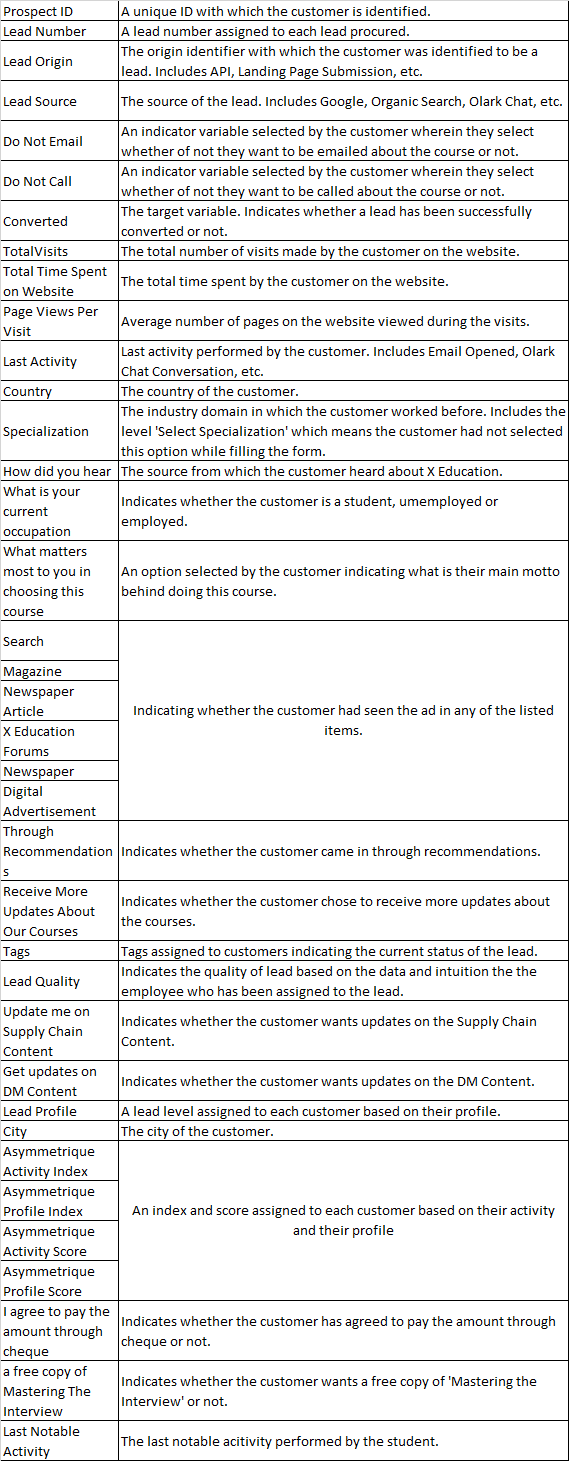

## Data Preparations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
dataset=pd.read_csv('/content/drive/MyDrive/Dataset/Leads.csv')
dataset.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
dataset.shape

(9240, 37)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Handling Missing Values



Tahapan yang dilakukan pertama adalah handling missing value :
1. Hapus variabel yang memiliki missing value > 30 %
2. Input missing value data numeric dengan median karena data memiliki distribusi right skew
3. Input categorical data menggunakan most frequent values


Hal ini perlu dilakukan agar data bisa digunakan pada model dengan baik.

In [5]:

dataset.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
pd.DataFrame([[dataset.shape],
            [dataset.isnull().sum().sum()],
             [dataset.duplicated().sum()]],
            columns = ['Application Data Set'],
            index = ['Shape', 'Missingness', 'Duplicates'])

,Application Data Set
Shape,"(9240, 37)"
Missingness,41039
Duplicates,0


In [7]:
#missing value persentage

percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Prospect ID,Prospect ID,0.000000
Lead Number,Lead Number,0.000000
Lead Origin,Lead Origin,0.000000
Lead Source,Lead Source,0.389610
Do Not Email,Do Not Email,0.000000
Do Not Call,Do Not Call,0.000000
Converted,Converted,0.000000
TotalVisits,TotalVisits,1.482684
Total Time Spent on Website,Total Time Spent on Website,0.000000
Page Views Per Visit,Page Views Per Visit,1.482684


In [8]:
# Get the list of variables with more than 30% missing values
missing_data_cols = list(missing_value_df[missing_value_df['percent_missing']>30]['column_name'])
missing_data_cols

['Tags',
 'Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [9]:
# remove variables with more than 30% Missing Values
dataset.drop(columns=missing_data_cols,inplace=True)

In [10]:
#input missing values
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'column_name': dataset.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Prospect ID,Prospect ID,0.000000
Lead Number,Lead Number,0.000000
Lead Origin,Lead Origin,0.000000
Lead Source,Lead Source,0.389610
Do Not Email,Do Not Email,0.000000
Do Not Call,Do Not Call,0.000000
Converted,Converted,0.000000
TotalVisits,TotalVisits,1.482684
Total Time Spent on Website,Total Time Spent on Website,0.000000
Page Views Per Visit,Page Views Per Visit,1.482684


In [11]:
dataset.select_dtypes(exclude=['object']).columns.tolist()

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Page Views Per Visit')

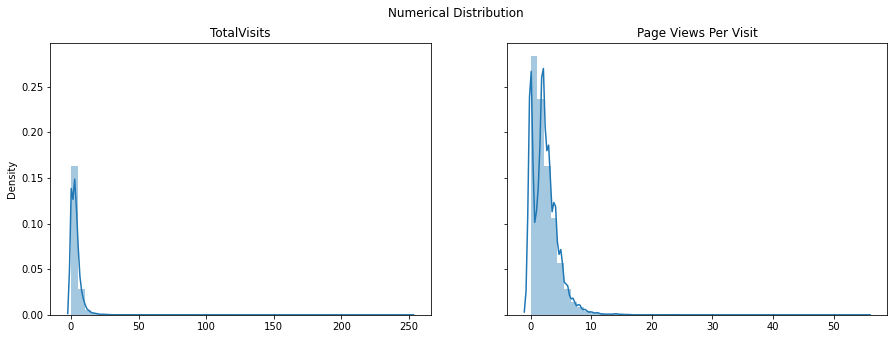

In [12]:
#input missing value with the most frequent
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Numerical Distribution')

# carat

sns.distplot(ax=axes[0],x=dataset['TotalVisits'])
axes[0].set_title('TotalVisits')

# table
sns.distplot(ax=axes[1],x=dataset['Page Views Per Visit'])
axes[1].set_title('Page Views Per Visit')



In [13]:
# handling numerical data using simpe imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(dataset[['TotalVisits','Page Views Per Visit']])
dataset[['TotalVisits','Page Views Per Visit']] = imputer.transform(dataset[['TotalVisits','Page Views Per Visit']])
dataset

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,No,No,NaN,Other Metro Cities,No,No,SMS Sent


Text(0.5, 1.0, 'What is your current occupatione')

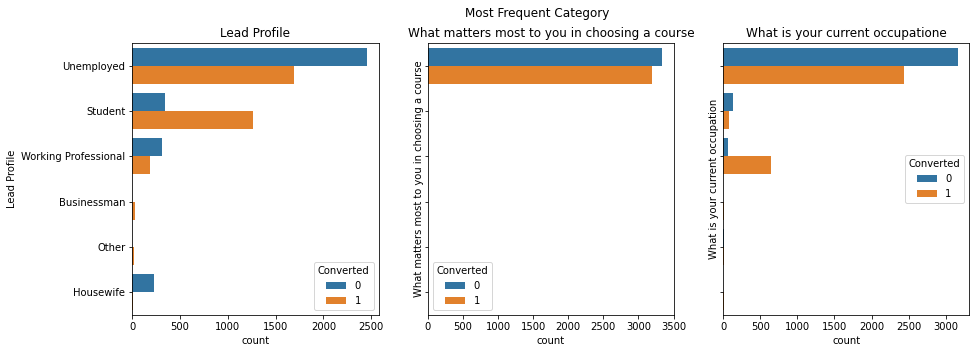

In [14]:
#input missing value with the most frequent
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Most Frequent Category')

# carat
sns.countplot(ax=axes[0],y='Lead Profile',hue='Converted',data=dataset);
axes[0].set_title('Lead Profile')

# table
sns.countplot(ax=axes[1],y='What matters most to you in choosing a course',hue='Converted',data=dataset);
axes[1].set_title('What matters most to you in choosing a course')

# x
sns.countplot(ax=axes[2],y='What is your current occupation',hue='Converted',data=dataset);
axes[2].set_title('What is your current occupatione')

In [15]:
dataset.select_dtypes(include=['object']).columns.tolist()

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [16]:
imputer = SimpleImputer(strategy='most_frequent', 
                        missing_values=np.nan)
imputer = imputer.fit(dataset)
dataset.iloc[:,:] = imputer.transform(dataset)
dataset

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Other Metro Cities,No,No,SMS Sent


In [17]:
dataset.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

Text(0.5, 1.0, 'Page Views Per Visit')

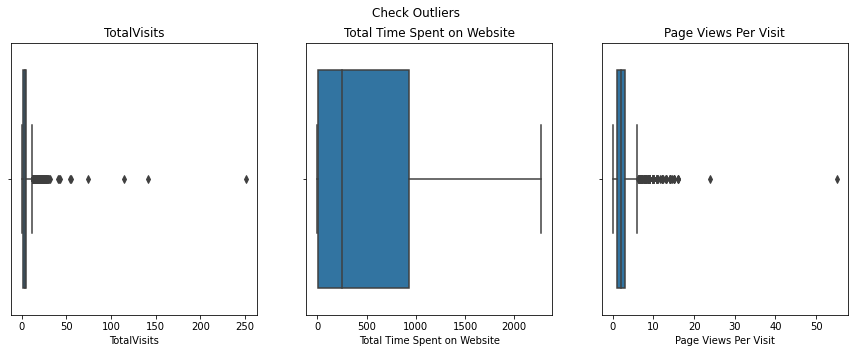

In [18]:
#Menangani Outliers

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Check Outliers')

# carat
sns.boxplot(ax=axes[0], x=dataset['TotalVisits'])
axes[0].set_title('TotalVisits')

# table
sns.boxplot(ax=axes[1], x=dataset['Total Time Spent on Website'])
axes[1].set_title('Total Time Spent on Website')

# x
sns.boxplot(ax=axes[2], x=dataset['Page Views Per Visit'])
axes[2].set_title('Page Views Per Visit')


Outlier tidak usah dihapus karena nilai tersebut bisa diperhitungkan dalam memprediksi lead

### Explanatory Data Analysis

In [19]:
### Check target values
dataset['Converted'].value_counts()


0    5679
1    3561
Name: Converted, dtype: int64

In [20]:
dataset['Converted'].value_counts(1)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

- 1 - indicates lead has been successfully converted
- 0 - indicates lead has not been converted

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


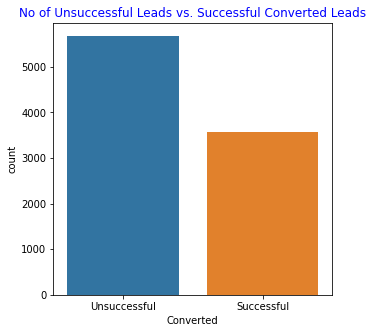

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(dataset['Converted']);
plt.title('No of Unsuccessful Leads vs. Successful Converted Leads',color='blue')
plt.xticks(np.arange(2),('Unsuccessful','Successful'));
#plt.legend(['0 - non-Converted','1 - Converted']);

### Obseravation from above plot
- The Target class is not highly imbalanced with 
    - 61.46% of observations as "0" - labeled as non-Converted or unsuccessful leads
    - 38.54% of observations as "1" - labeled as Converted or successful leads

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

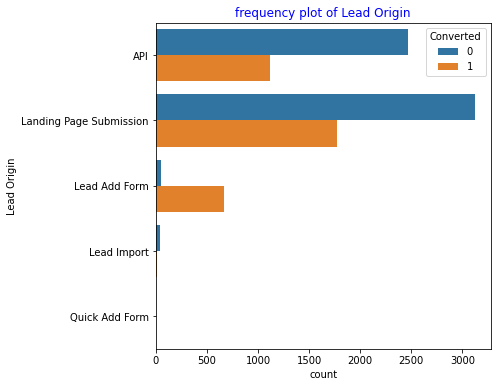

In [23]:
# Plot Leand Origin
plt.figure(figsize=(6,6))
plt.title('frequency plot of Lead Origin',color='blue')
sns.countplot(y='Lead Origin',hue='Converted',data=dataset);

In [24]:
crosstab_df = pd.crosstab(dataset['Converted'],
            dataset['Lead Origin']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Lead Origin,API,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form
Converted,,,,,
0,68.85,63.81,7.52,76.36,0.0
1,31.15,36.19,92.48,23.64,100.0


Dapat dilihat bahwa lead origin converted kebanyakan berasal dari lead add form, sangat berbeda dengan yang tidak converted

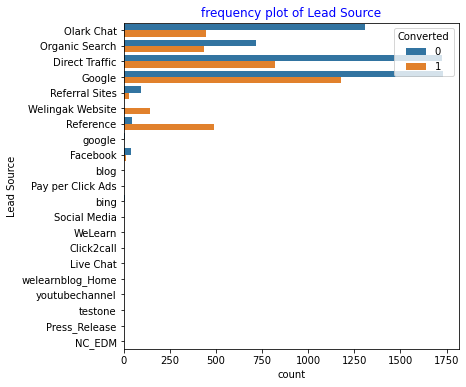

In [25]:
#plot leadsource
plt.figure(figsize=(6,6))
plt.title('frequency plot of Lead Source',color='blue')
sns.countplot(y='Lead Source',hue='Converted',data=dataset);

In [26]:
crosstab_df = pd.crosstab(dataset['Converted'],
            dataset['Lead Source']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Lead Source,Click2call,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel
Converted,,,,,,,,,,,,,,,,,,,,,
0,25.0,67.83,76.36,59.5,0.0,0.0,74.47,62.22,100.0,100.0,8.24,75.2,50.0,0.0,1.41,83.33,100.0,100.0,100.0,100.0,100.0
1,75.0,32.17,23.64,40.5,100.0,100.0,25.53,37.78,0.0,0.0,91.76,24.8,50.0,100.0,98.59,16.67,0.0,0.0,0.0,0.0,0.0


Lead rate paling tinggi berasal dari Welingak Website

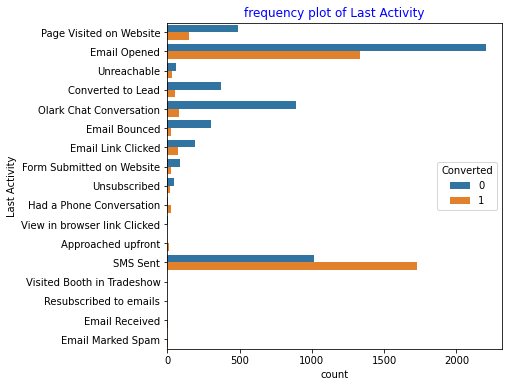

In [27]:
# last activity

plt.figure(figsize=(6,6))
plt.title('frequency plot of Last Activity',color='blue')
sns.countplot(y='Last Activity',hue='Converted',data=dataset);

Dapat kita lihat bahwaSMS sent memiliki converted rate paling tinggi

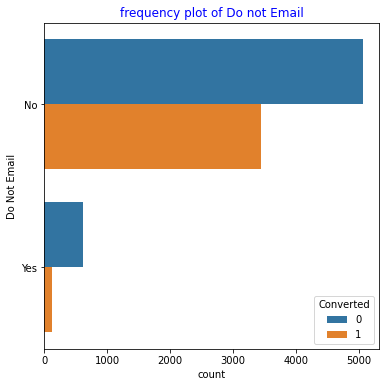

In [28]:
# email

plt.figure(figsize=(6,6))
plt.title('frequency plot of Do not Email',color='blue')
sns.countplot(y='Do Not Email',hue='Converted',data=dataset);

In [29]:
crosstab_df = pd.crosstab(dataset['Converted'],
            dataset['Do Not Email']).apply(lambda x: round((x/x.sum())*100,2), axis=0)
crosstab_df

Do Not Email,No,Yes
Converted,,
0,59.52,83.92
1,40.48,16.08


Conversion rate tinggi pada customer yang Do Not Emailnya NO

In [30]:
#Cek Categorical Value
dataset['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [31]:
dataset['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [32]:
dataset['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [33]:
dataset['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [34]:
dataset['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [35]:
dataset['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [36]:
dataset['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [37]:
dataset['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

karena variasi datanya dikit, maka colum2 dibawah ini akan dihapus
- Do Not Call
- Search
- Newspaper Article
- X Education Forum
- Newspaper
- Digital Advertisement
- Through Recommendations

In [38]:
dataset.drop(columns=['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
                           'Digital Advertisement','Through Recommendations'],inplace=True)

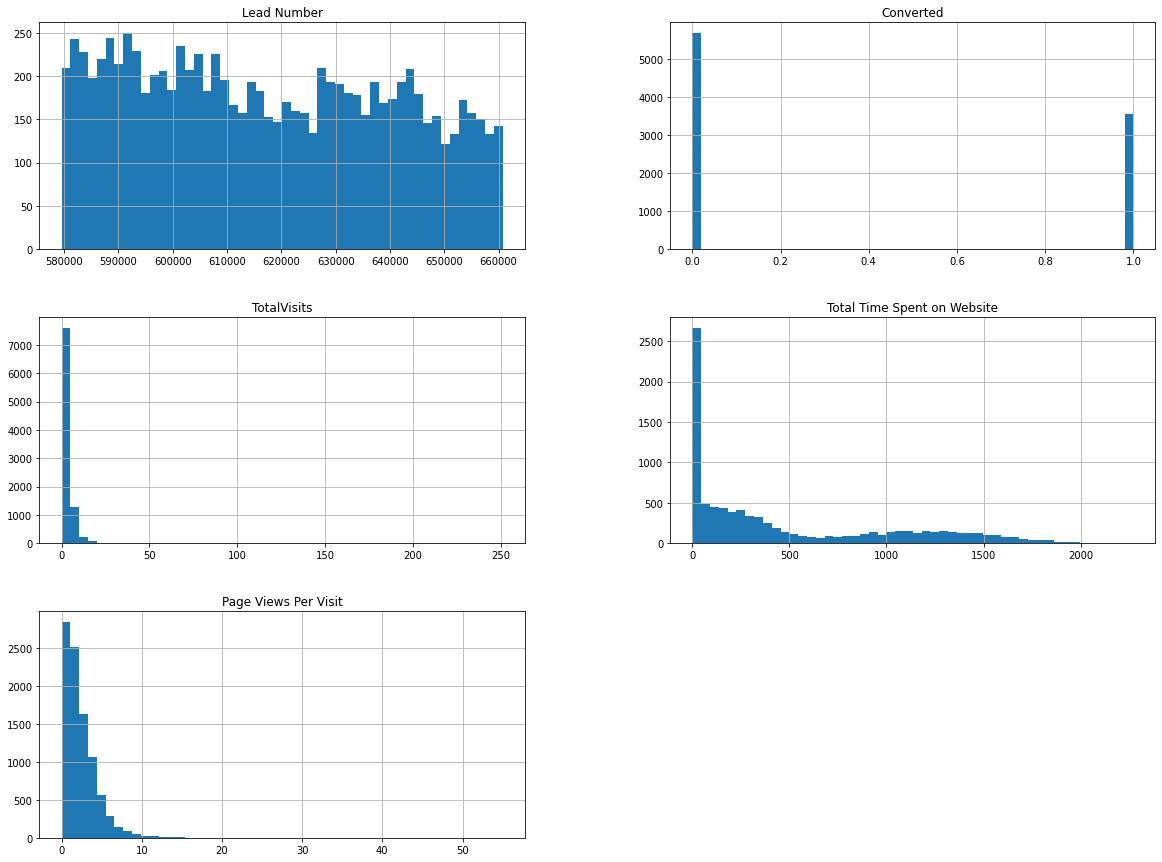

In [39]:
#numerical Features
dataset.hist(bins=50, figsize=(20,15))
plt.show()

## Data Prepation For Modelling

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

In [41]:
dataset2=dataset.copy()

In [42]:
dataset2.drop(columns = ['Prospect ID','Lead Number'],inplace=True)

In [43]:
# One-Hot_Encoding

object_cols = [col for col in  dataset2.select_dtypes(include=np.object).columns]
numerical_cols = [col for col in dataset2.select_dtypes(include=np.number).columns]

## Remove Converted from Numerical Columns list
numerical_cols.remove('Converted')
print(numerical_cols)
print(object_cols)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [44]:
# apply one hot encoding

dataset2 = pd.get_dummies(data=dataset2,columns=object_cols,drop_first=True)
dataset2.sample(10)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,...,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
587,0,3.0,11,2.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7241,0,1.0,42,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1744,1,5.0,786,5.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5989,0,8.0,139,8.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2001,1,3.0,1212,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5694,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2328,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6053,0,5.0,16,5.0,1,0,0,0,0,0,1,0,0

In [45]:
# Check correlation each variables

leadscore_corr = dataset2.corr()
leadscore_corr.style.apply(lambda x: 
                           ["background: lightblue" if abs(v) > 0.5
                            else  
                            ("background: lightyellow" if abs(v) > 0.3 
                             else "" ) for v in x], axis = 1)

## Modelling

In [107]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss

#### Mendefinisikan Dataset

In [47]:
X = dataset2.drop(columns = ['Converted'])
y = dataset2['Converted']

#### Membagi Dataset

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

#### Melakukan Standarisasi

In [52]:

sc = StandardScaler()
#sc = MinMaxScaler()

#Create X_train_scaled, X_test_scaled
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

#Fit and transform Train
X_train_scaled[numerical_cols] = sc.fit_transform(X_train[numerical_cols])

#Transform Test (No Fit)
X_test_scaled[numerical_cols] = sc.transform(X_test[numerical_cols])

In [53]:
X_train_scaled.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,...,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6627,-0.279870,1.127624,-0.174194,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4953,0.289435,-0.523427,1.195387,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5111,0.099666,-0.444980,0.738860,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1906,-0.279870,1.682232,-0.630721,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4917,-0.659406,-0.890125,-1.087247,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### Cek Model Terbaik

In [60]:
## collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier]
all_model

## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for i in all_model:
    model = i()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    datatr.append(model.score(X_train , y_train))
    datasc.append(model.score(X_test , y_test))
    Recall.append(recall_score(y_test,y_pred))
    Precision.append(precision_score(y_test,y_pred))
    auc.append(roc_auc_score(y_test, y_pred))

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
            'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier']
model_name

## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
9,XGBClassifier,0.854360,0.845960,0.827893,0.767890,0.832221,0.008400
7,GradientBoostingClassifier,0.857607,0.845599,0.827075,0.767890,0.831924,0.012008
6,RandomForestClassifier,0.978510,0.841270,0.823705,0.758716,0.826742,0.137240
1,LogisticRegression,0.826531,0.836219,0.816103,0.753211,0.821611,0.009689
8,ExtraTreesClassifier,0.978510,0.819264,0.787317,0.740367,0.805380,0.159246
5,LinearSVC,0.800093,0.799423,0.700150,0.856881,0.809534,0.000670
0,DecisionTreeClassifier,0.978510,0.796176,0.747875,0.726606,0.783933,0.182334
2,KNeighborsClassifier,0.832870,0.774892,0.728880,0.680734,0.758322,0.057978
4,SVC,0.731756,0.729437,0.703837,0.538532,0.695842,0.002319
3,GaussianNB,0.733921,0.729076,0.619788,0.804587,0.742365,0.004844


In [62]:
#dengan menggunakan standarisasi


## collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier]
all_model

## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for i in all_model:
    model = i()
    model.fit(X_train_scaled,y_train)
    y_pred=model.predict(X_test)
    datatr.append(model.score(X_train_scaled , y_train))
    datasc.append(model.score(X_test_scaled , y_test))
    Recall.append(recall_score(y_test,y_pred))
    Precision.append(precision_score(y_test,y_pred))
    auc.append(roc_auc_score(y_test, y_pred))

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
            'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier']
model_name

## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
4,SVC,0.864873,0.846681,0.878136,0.224771,0.602278,0.018192
9,XGBClassifier,0.854360,0.845960,0.709226,0.789908,0.790020,0.008400
7,GradientBoostingClassifier,0.857607,0.845599,0.778429,0.609174,0.748404,0.012008
6,RandomForestClassifier,0.978510,0.839466,0.630342,0.811927,0.751683,0.139043
1,LogisticRegression,0.832715,0.833694,0.437448,0.955963,0.579646,0.000979
5,LinearSVC,0.833488,0.832973,0.436897,0.955963,0.578755,0.000515
8,ExtraTreesClassifier,0.978510,0.824315,0.649926,0.807339,0.762766,0.154195
2,KNeighborsClassifier,0.861781,0.805195,0.443147,0.940367,0.587306,0.056586
0,DecisionTreeClassifier,0.978510,0.803030,0.404355,0.477064,0.510827,0.175479
3,GaussianNB,0.465059,0.477273,0.401340,0.988991,0.516493,0.012214


In [94]:
#dengan senggunkan handling imbalance data

from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)


from collections import Counter

print(Counter(y_sm).keys()) # equals to list(set(words))
print(Counter(y_sm).values()) # counts the elements' frequency

all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier]
all_model

## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for i in all_model:
    model = i()
    model.fit(X_train_SMOTE,y_train_SMOTE)
    y_pred_sm=model.predict(X_test.values)
    datatr.append(model.score(X_train_SMOTE , y_train_SMOTE))
    datasc.append(model.score(X_test.values , y_test))
    Recall.append(recall_score(y_test,y_pred_sm))
    Precision.append(precision_score(y_test,y_pred_sm))
    auc.append(roc_auc_score(y_test, y_pred_sm))

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
            'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier']
model_name

## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


dict_keys([0, 1])
dict_values([5679, 5679])


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
9,XGBClassifier,0.870653,0.845960,0.811268,0.792661,0.836580,0.024693
7,GradientBoostingClassifier,0.871779,0.845238,0.806871,0.797248,0.836793,0.026541
6,RandomForestClassifier,0.979735,0.834776,0.795327,0.780734,0.825266,0.144958
1,LogisticRegression,0.821366,0.821429,0.754491,0.809174,0.819272,0.000063
8,ExtraTreesClassifier,0.979735,0.821429,0.775718,0.767890,0.812007,0.158306
5,LinearSVC,0.783463,0.792929,0.777419,0.663303,0.770117,0.009467
0,DecisionTreeClassifier,0.979735,0.790404,0.725821,0.750459,0.783374,0.189331
2,KNeighborsClassifier,0.855141,0.768759,0.684167,0.765138,0.768122,0.086382
4,SVC,0.700525,0.729076,0.694158,0.555963,0.698612,0.028551
3,GaussianNB,0.705404,0.654401,0.538642,0.844037,0.687773,0.051003


Menggunakan Smotte menghasilkan model yang lebih baik

### Baseline Model

In [87]:
#XGB Classifier

from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

XGB = XGBClassifier()
XGB_fit_smote = XGB.fit(X_train_SMOTE,y_train_SMOTE)
y_pred_normal=XGB_fit_smote.predict(X_train_SMOTE)

print('Classification Report Train Data')
print(classification_report(y_train_SMOTE,y_pred_normal))

print('Classification Report Test Data')
# prediction for Testing data
test_pred_sm = XGB.predict(X_test.values)
print(classification_report(y_test,test_pred_sm))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Classification Report Train Data
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3997
           1       0.88      0.86      0.87      3997

    accuracy                           0.87      7994
   macro avg       0.87      0.87      0.87      7994
weighted avg       0.87      0.87      0.87      7994

Classification Report Test Data
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1682
           1       0.81      0.79      0.80      1090

    accuracy                           0.85      2772
   macro avg       0.84      0.84      0.84      2772
weighted avg       0.85      0.85      0.85      2772



Confusion Matrix: [[1481  226]
 [ 201  864]]


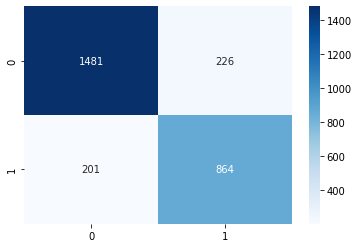

In [88]:
## inisiasi confusion_matrix untuk pred dan target tes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_pred_sm, y_test)
print('Confusion Matrix: {}'.format(cm))
## visualisasi
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')

In [90]:
#Random Forest

RF = RandomForestClassifier()
RF_fit_smote = RF.fit(X_train_SMOTE,y_train_SMOTE)
y_pred_normal=RF_fit_smote.predict(X_train_SMOTE)

print('Classification Report Train Data')
print(classification_report(y_train_SMOTE,y_pred_normal))

print('Classification Report Test Data')
# prediction for Testing data
test_pred_sm = RF.predict(X_test.values)
print(classification_report(y_test,test_pred_sm))


Classification Report Train Data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3997
           1       0.97      0.99      0.98      3997

    accuracy                           0.98      7994
   macro avg       0.98      0.98      0.98      7994
weighted avg       0.98      0.98      0.98      7994

Classification Report Test Data
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1682
           1       0.81      0.79      0.80      1090

    accuracy                           0.84      2772
   macro avg       0.84      0.83      0.83      2772
weighted avg       0.84      0.84      0.84      2772



Confusion Matrix: [[1478  233]
 [ 204  857]]


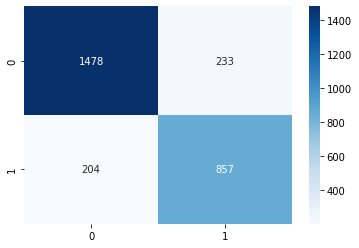

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_pred_sm, y_test)
print('Confusion Matrix: {}'.format(cm))
## visualisasi
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')

### Check Feature Importance


In [106]:
Feature_score=zip(X.columns, XGB.feature_importances_)

names=[]
scores=[]
for name,score in Feature_score:
  names.append(name)
  scores.append(score)

Feature=pd.DataFrame()
Feature['Variables']=names
Feature['Score']=scores

Feature.sort_values(by='Score',ascending=False)

,Variables,Score
138,Last Notable Activity_SMS Sent,0.192420
117,Lead Profile_Potential Lead,0.173422
4,Lead Origin_Lead Add Form,0.148418
112,What is your current occupation_Working Profes...,0.056401
1,Total Time Spent on Website,0.049291
...,...,...
53,Country_Ghana,0.000000
52,Country_Germany,0.000000
51,Country_France,0.000000
50,Country_Denmark,0.000000


Model yang lebih baik menggunakan XGB Classifier

### Pengembangan Model XGB Classifier  dengan Hyper Parameter Tuning Random Search

In [109]:
 param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

xgb_model = XGBClassifier()
gsearch=GridSearchCV(estimator=xgb_model,param_grid=param_tuning,cv=3,n_jobs=-1,verbose=1)


gsearch.fit(X_train,y_train)

gsearch.best_params_



Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 58.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 68.0min finished


{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [110]:
print('Best Score: {}'.format(gsearch.best_score_))

Best Score: 0.8421459492888065


## Evaluasi Model

In [113]:
XGB_tun= XGBClassifier(**gsearch.best_params_)
XGB_tun.fit(X_train,y_train)
y_pred_train=XGB_tun.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3997
           1       0.87      0.76      0.81      2471

    accuracy                           0.87      6468
   macro avg       0.87      0.85      0.85      6468
weighted avg       0.87      0.87      0.86      6468



In [114]:
y_pred_test0=XGB_tun.predict(X_test)
print(classification_report(y_test,y_pred_test0))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1682
           1       0.84      0.76      0.80      1090

    accuracy                           0.85      2772
   macro avg       0.85      0.83      0.84      2772
weighted avg       0.85      0.85      0.85      2772



Penggunaan Model XGBClassifier dengan SMOTE memiliki nilai akurasi yang sama dengan Model XGBClassifier yang telah di Tunning parameter sebesar 85%.

## Confusion Metrics

Confusion Matrix: [[3708  289]
 [ 582 1889]]


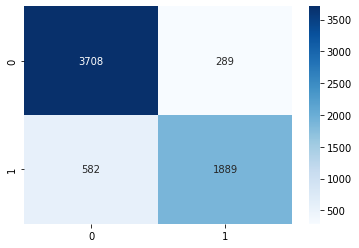

In [120]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: {}'.format(cm))
## visualisasi
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')

Confusion Matrix: [[1530  267]
 [ 152  823]]


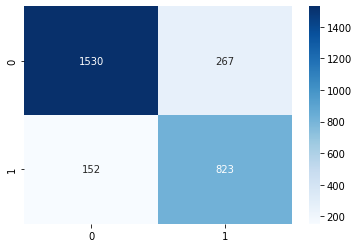

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_test0, y_test)
print('Confusion Matrix: {}'.format(cm))
## visualisasi
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')

## Simpan Hasil Prediksi Pada dataset


In [119]:

X_test['preds'] =y_pred_test0

df_out = pd.merge(dataset,X_test[['preds']],how = 'right',left_index = True, right_index = True)
df_out

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,preds
2212,ed1e4958-8371-4c2a-9770-820a7bc3c8ee,638355,API,Google,No,0,2.0,1099,2.00,Page Visited on Website,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,Select,Select,No,No,Modified,0
3034,1da9a8e8-1e4d-44bf-9175-afed1cb0f3e8,630775,Lead Add Form,Reference,No,1,1.0,1247,1.00,Email Link Clicked,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,Select,Select,No,No,Modified,1
4492,910eda7c-694e-4ae2-a1b2-15d9dd415683,616592,API,Olark Chat,No,0,1.0,198,1.00,Olark Chat Conversation,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,Select,Select,No,No,Olark Chat Conversation,0
5063,0514c5b6-6f61-4374-8d74-812c456d9a7e,611224,Landing Page Submission,Organic Search,Yes,0,5.0,245,2.50,SMS Sent,India,Human Resource Management,Select,Unemployed,Better Career Prospects,No,No,No,No,Select,Mumbai,No,Yes,SMS Sent,0
7645,021ff8a2-9b16-49d8-8ec2-941391c77bce,591141,API,Olark Chat,No,0,0.0,0,0.00,Olark Chat Conversation,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,Select,Mumbai,No,No,Modified,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7966,6c140edf-fffe-4740-a414-867ad2e531fc,588753,Lead Add Form,Reference,No,1,0.0,0,0.00,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,Select,Select,No,No,Modified,1
9071,cc5a3b9b-b998-4d43-8bbb-42e22b3dac26,580800,API,Olark Chat,No,0,0.0,0,0.00,Olark Chat Conversation,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,Select,Mumbai,No,No,Modified,0
6208,a849353a-ba71-45b9-948d-43b4a8658655,602193,API,Direct Traffic,No,0,2.0,596,2.00,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,Select,Select,No,No,Email Opened,0
6589,ef2fd3d6-e72f-4c3c-979b-d77425e93366,599247,Landing Page Submission,Google,No,0,5.0,177,5.00,Page Visited on Website,India,Human Resource Management,Student of SomeSchool,Unemployed,Better Career Prospects,No,No,No,No,Other Leads,Mumbai,No,No,Modified,0


## Penutupan

Model untuk memprediksi apakah customer tersebuat leads atau tidak telah selesai dibua dan model ini dapat digunakan untuk meprediksi pada data sebenarnya.  Namun demikian beberapa pengembangan lain masih dapat dilakukan agar membuat model yang memiliki akurasi lebih tinggi lagi seperti dengan mencoba penggunaan algoritma lainnya dalam membuat model seperti Random Forest, Decision Tree, Logistic Regression dan masih banyak lagi.

## Referensi

[[1]()] https://towardsdatascience.com/predict-lead-score-the-right-way-using-pycaret-332faa780cfc

[[2]()] https://vidhutandon.medium.com/lead-conversion-score-prediction-using-python-a65d5bb7ccff

[[3]()] https://rey1024.medium.com/mengenal-accuracy-precission-recall-dan-specificity-serta-yang-diprioritaskan-b79ff4d77de8

[[4]()] https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

[[5]()] https://www.kaggle.com/felipefiorini/xgboost-hyper-parameter-tuning

[[6]()] https://github.com/salinaaaaaa/Machine-Learning-For-Predictive-Lead-Scoring/blob/master/notebooks/1.0-exploratory-analysis.ipynb


